# WeatherPy
----

### Analysis
* Latitues between 20 and -20 had highest temperatures
* Latitudes north of 60 had high wind speeds
* Humidity seemed lower in Northern latitudes


In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = "output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
url = "http://api.openweathermap.org/data/2.5/weather?"
mycities = []
cloud = []
country = []
date = []
humid = []
lat = []
lon = []
mtemp = []
wind = []

for index, city in enumerate(cities):
    query_url = url + "appid=" + api_key + "&units=imperial&q=" + city
    response = requests.get(query_url)
    if response.ok:
            response = requests.get(query_url).json()
            mycities.append(city)
            cloud.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humid.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            mtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])
            print(f"Processing Record {index+1} | {city}")
    else:
         print('Got an error')
        

Processing Record 1 | sitka
Processing Record 2 | zhangye
Processing Record 3 | ushuaia
Processing Record 4 | port alfred
Processing Record 5 | albany
Processing Record 6 | butaritari
Processing Record 7 | verkhoyansk
Processing Record 8 | upernavik
Processing Record 9 | davenda
Processing Record 10 | sao joao da barra
Processing Record 11 | hilo
Processing Record 12 | shimoda
Processing Record 13 | kapaa
Processing Record 14 | lakhdenpokhya
Processing Record 15 | lebu
Processing Record 16 | hermanus
Processing Record 17 | rikitea
Processing Record 18 | sao miguel do araguaia
Processing Record 19 | tchaourou
Processing Record 20 | melbu
Processing Record 21 | villa maria
Processing Record 22 | provideniya
Processing Record 23 | punta arenas
Processing Record 24 | alofi
Processing Record 25 | vanimo
Processing Record 26 | alba
Got an error
Processing Record 28 | castro
Processing Record 29 | saskylakh
Processing Record 30 | souillac
Processing Record 31 | roald
Processing Record 32 | me

Processing Record 268 | aden
Processing Record 269 | caravelas
Processing Record 270 | bonavista
Processing Record 271 | kirksville
Processing Record 272 | pangody
Processing Record 273 | turukhansk
Processing Record 274 | havre
Processing Record 275 | ambon
Processing Record 276 | rio gallegos
Processing Record 277 | yuzhnyy
Processing Record 278 | chibuto
Processing Record 279 | phonhong
Processing Record 280 | shibetsu
Processing Record 281 | arecibo
Processing Record 282 | leningradskiy
Processing Record 283 | tautira
Processing Record 284 | upington
Processing Record 285 | olga
Processing Record 286 | lukovetskiy
Processing Record 287 | zunyi
Processing Record 288 | tarnogskiy gorodok
Processing Record 289 | inhambane
Processing Record 290 | lukow
Processing Record 291 | grindavik
Processing Record 292 | westport
Processing Record 293 | kropotkin
Processing Record 294 | kenai
Processing Record 295 | coruripe
Processing Record 296 | bethel
Got an error
Processing Record 298 | cerna

Processing Record 534 | sandakan
Processing Record 535 | itaparica
Processing Record 536 | labuan
Processing Record 537 | gimli
Processing Record 538 | porto novo
Processing Record 539 | ngerengere
Processing Record 540 | huarmey
Processing Record 541 | riyadh
Processing Record 542 | ola
Processing Record 543 | ahipara
Processing Record 544 | buala
Processing Record 545 | santa marta
Got an error
Processing Record 547 | maraba
Processing Record 548 | thanjavur
Processing Record 549 | indramayu
Got an error
Processing Record 551 | rocha
Processing Record 552 | timmins
Processing Record 553 | hualmay
Got an error
Processing Record 555 | la ligua
Got an error
Processing Record 557 | pittsburg
Processing Record 558 | presidente medici
Processing Record 559 | hede
Got an error
Processing Record 561 | fortuna
Processing Record 562 | dhidhdhoo
Processing Record 563 | paragould
Processing Record 564 | saint-joseph
Processing Record 565 | sambava
Processing Record 566 | yarmouth
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
weather_dict = {
    "City": mycities,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date.format(date),
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": mtemp,
    "Wind Speed": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_file, index=False, header=True)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,sitka,24,US,03/26/19,61,37.17,-99.65,60.01,10.00
1,zhangye,0,CN,03/26/19,56,38.94,100.46,26.95,7.11
2,ushuaia,75,AR,03/26/19,76,-54.81,-68.31,51.80,3.36
3,port alfred,36,ZA,03/26/19,93,-33.59,26.89,65.61,9.35
4,albany,1,US,03/26/19,24,42.65,-73.75,36.00,12.75


#### Latitude vs. Temperature Plot

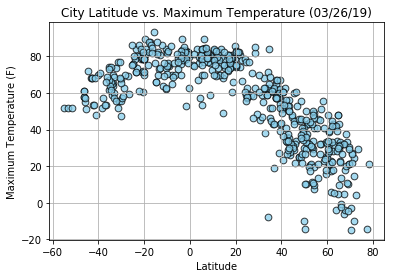

In [41]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Max Temp'], marker="o", facecolors="skyblue", edgecolors="black",
            s=45, alpha=0.75)
plt.grid()
title = "City Latitude vs. Maximum Temperature ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("lat_vs_temp.png")

#### Latitude vs. Humidity Plot

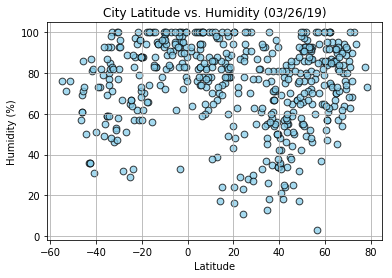

In [42]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], marker="o", facecolors="skyblue", edgecolors="black",
            s=45, alpha=0.75)
plt.grid()
title = "City Latitude vs. Humidity ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

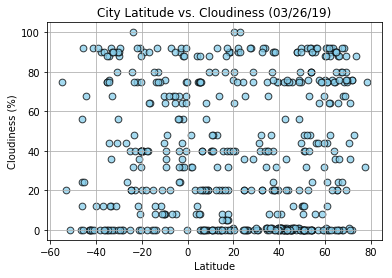

In [43]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], marker="o", facecolors="skyblue", edgecolors="black",
            s=45, alpha=0.75)
plt.grid()
title = "City Latitude vs. Cloudiness ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

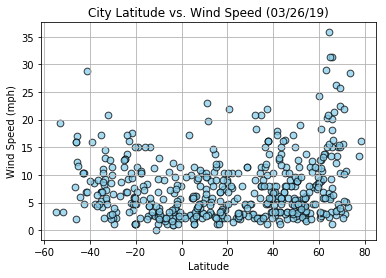

In [45]:
date = time.strftime("%x")
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], marker="o", facecolors="skyblue", edgecolors="black",
            s=45, alpha=0.75)
plt.grid()
title = "City Latitude vs. Wind Speed ({})".format(date)
plt.title(title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("lat_vs_wind.png")